1 Identifying trends in time scales

In [2]:
library(lubridate)
library(animation)
library(tidyverse)
library(forcats)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
as.difftime(): lubridate, base
date():        lubridate, base
filter():      dplyr, stats
intersect():   lubridate, base
lag():         dplyr, stats
setdiff():     lubridate, base
union():       lubridate, base


In [3]:
setClass('Date/Time')
setAs('character', 'Date/Time', function(from) mdy_hms(from))

data <- read_csv('../input/uber-raw-data-apr14.csv', skip = 1, col_names = c("DateTime", 'Lat', 'Lon', 'Base'))

data <- data %>% mutate(DateTime = mdy_hms(DateTime),
                         Weekday = wday(DateTime, label=T, abbr=F),
                         Minute = minute(DateTime),
                         Base = fct_recode(Base,
                         "Unter" = "B02512" ,
                         "Hinter" = "B02598",
                         "Weiter" = "B02617",
                         "Schmecken" = "B02682",
                         "Danach-NY" = "B02764")) %>% as_tibble()

Parsed with column specification:
cols(
  DateTime = col_character(),
  Lat = col_double(),
  Lon = col_double(),
  Base = col_character()
)


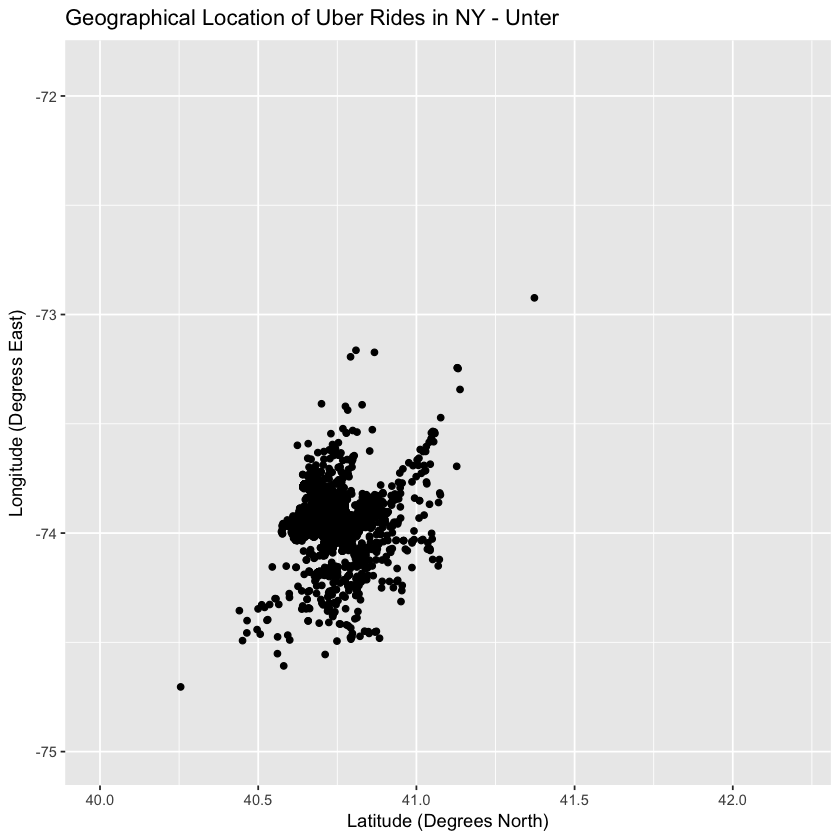

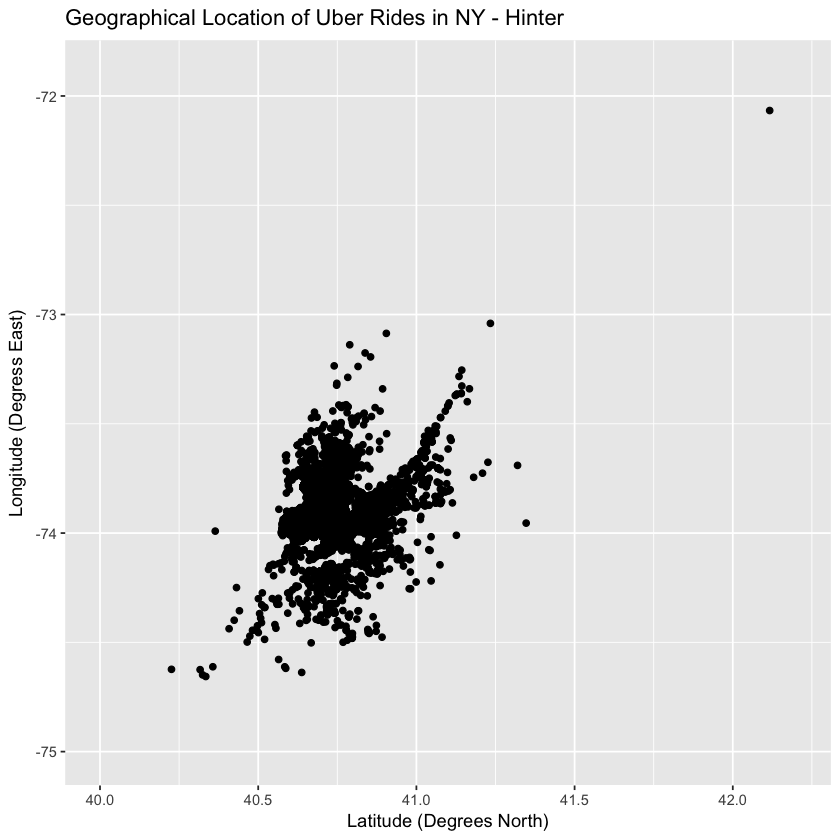

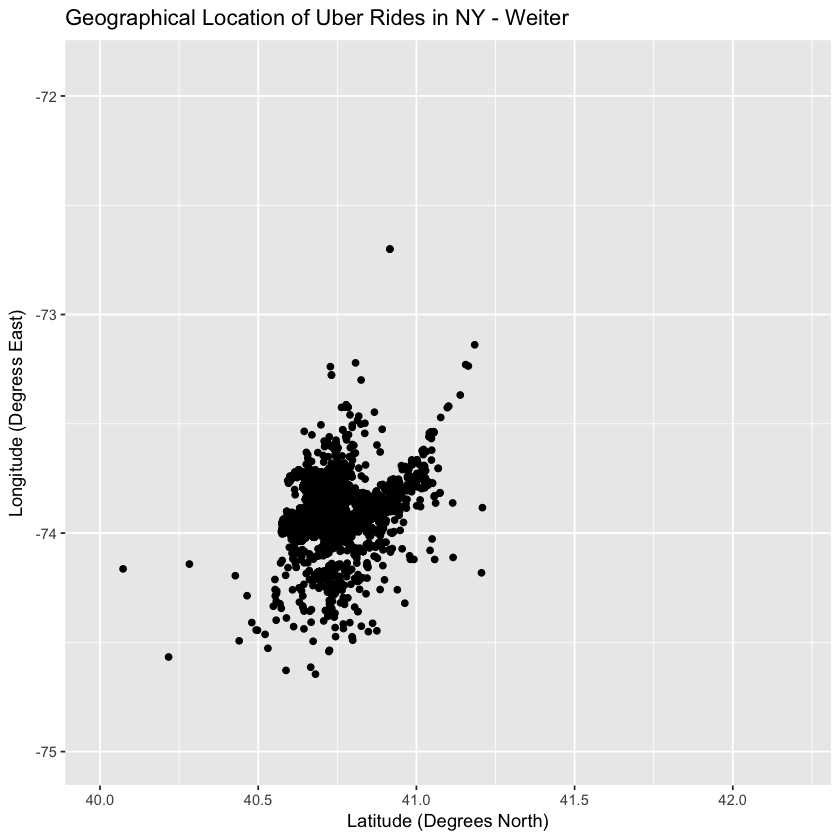

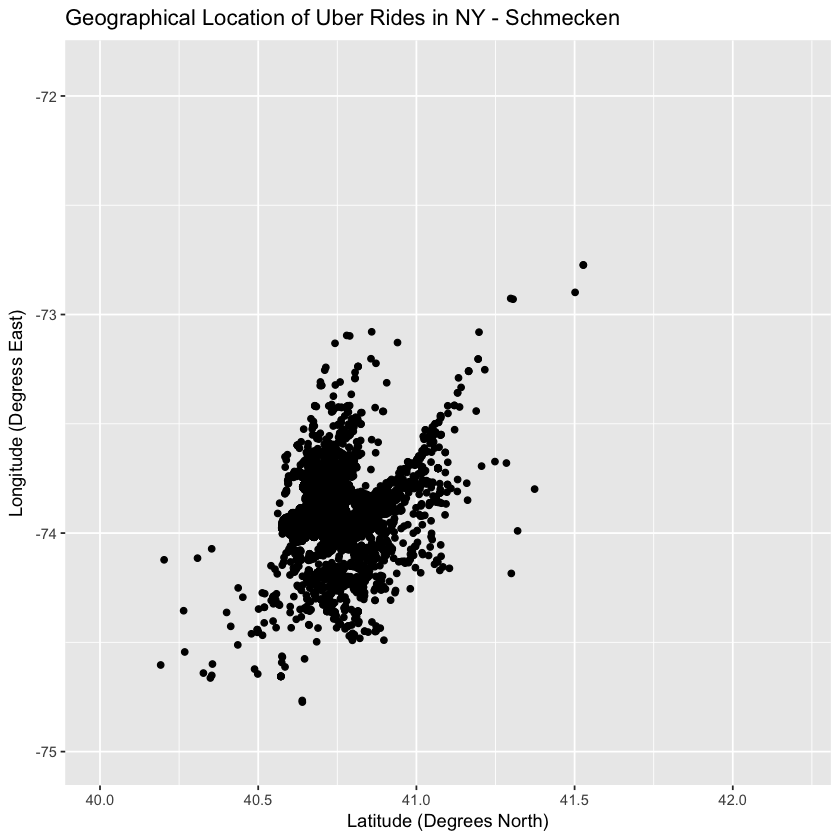

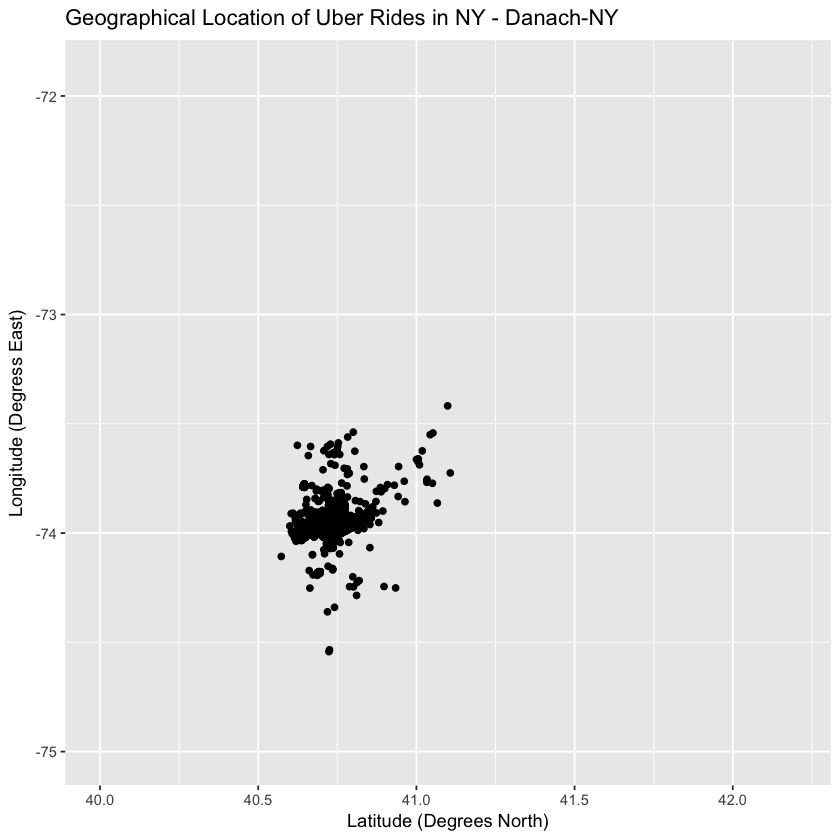

In [4]:
for (base in levels(data$Base)) {
  print(ggplot(data[data$Base == base,]) + geom_point(aes(x = Lat, y = Lon)) +
        ggtitle(paste('Geographical Location of Uber Rides in NY - ', base, sep='')) +
        xlab('Latitude (Degrees North)') +
        ylab('Longitude (Degress East)') +
        xlim(40, 42.2) +
        ylim(-75, -71.9))
}

Warning message:
“Removed 15 rows containing missing values (geom_path).”

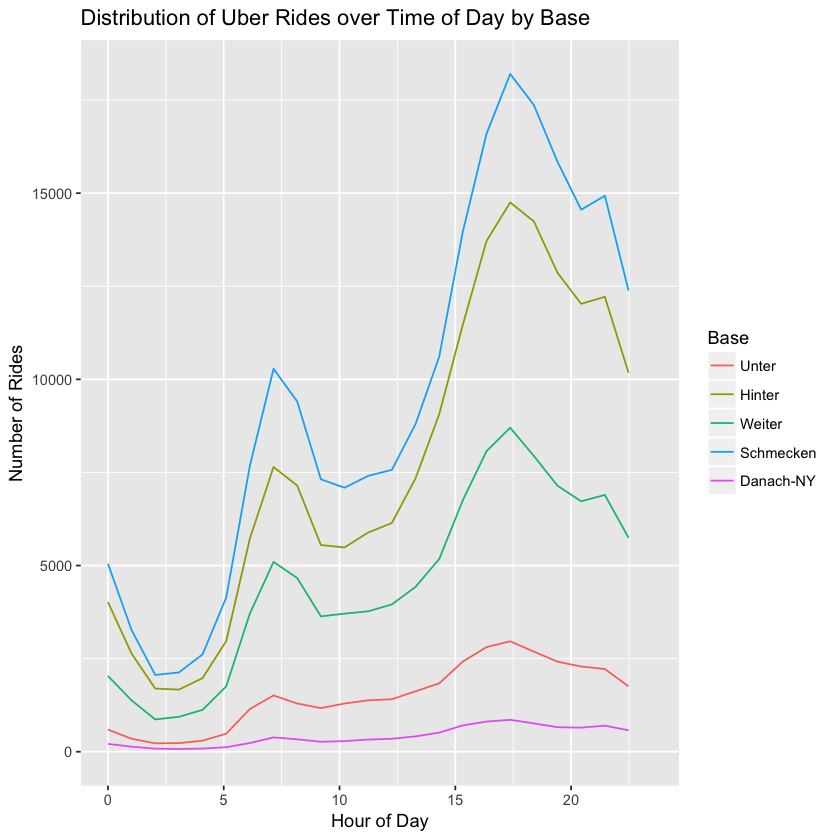

In [5]:
ggplot(data) + 
        geom_freqpoly(aes(x=hour(DateTime), color=Base), bins=24) +
        ggtitle('Distribution of Uber Rides over Time of Day by Base') +
        xlab('Hour of Day') + 
        ylab('Number of Rides') +
        xlim(0, 23.5)


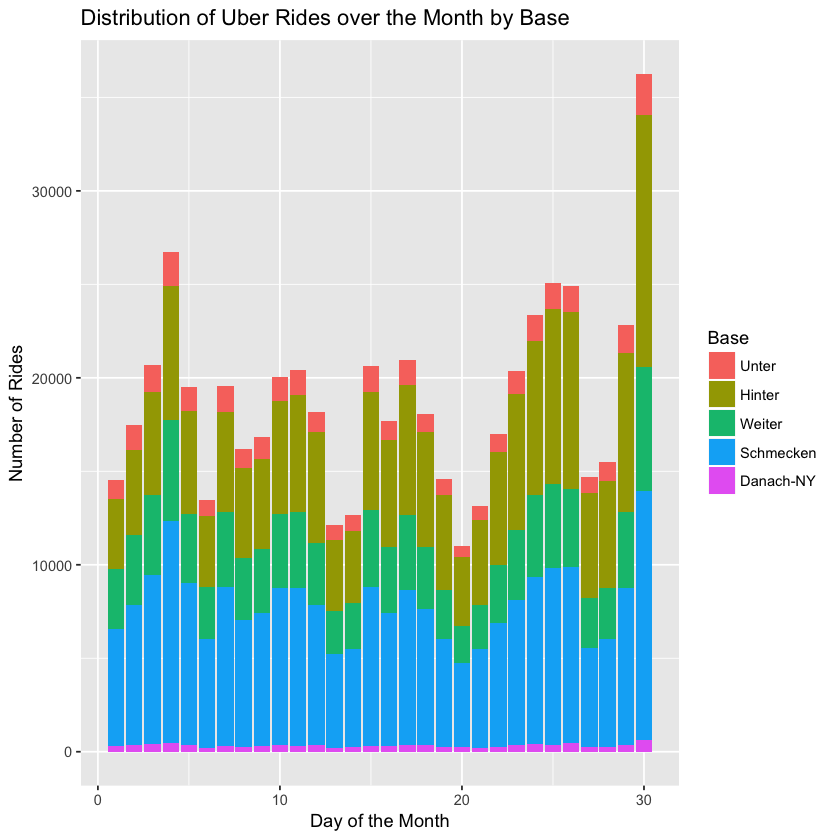

In [6]:
ggplot(data) + 
        geom_bar(aes(x=day(DateTime), fill=Base)) +
        ggtitle('Distribution of Uber Rides over the Month by Base') +
        xlab('Day of the Month') + 
        ylab('Number of Rides')

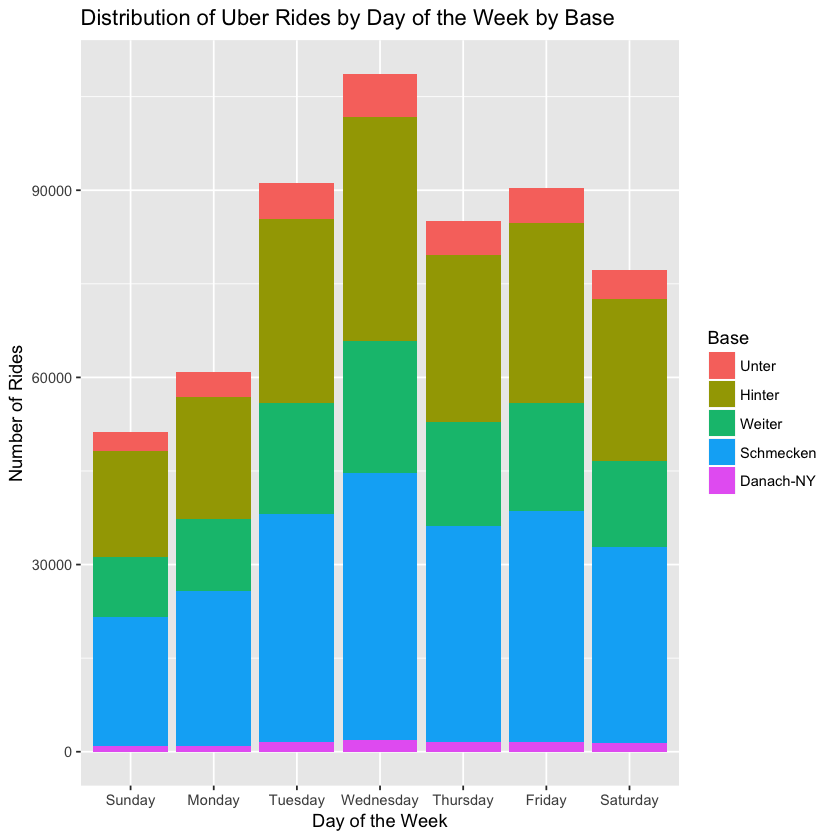

In [7]:
ggplot(data) +
        geom_bar(aes(x = Weekday, fill = Base)) + 
        ggtitle('Distribution of Uber Rides by Day of the Week by Base') + 
        xlab('Day of the Week') + 
        ylab('Number of Rides') 

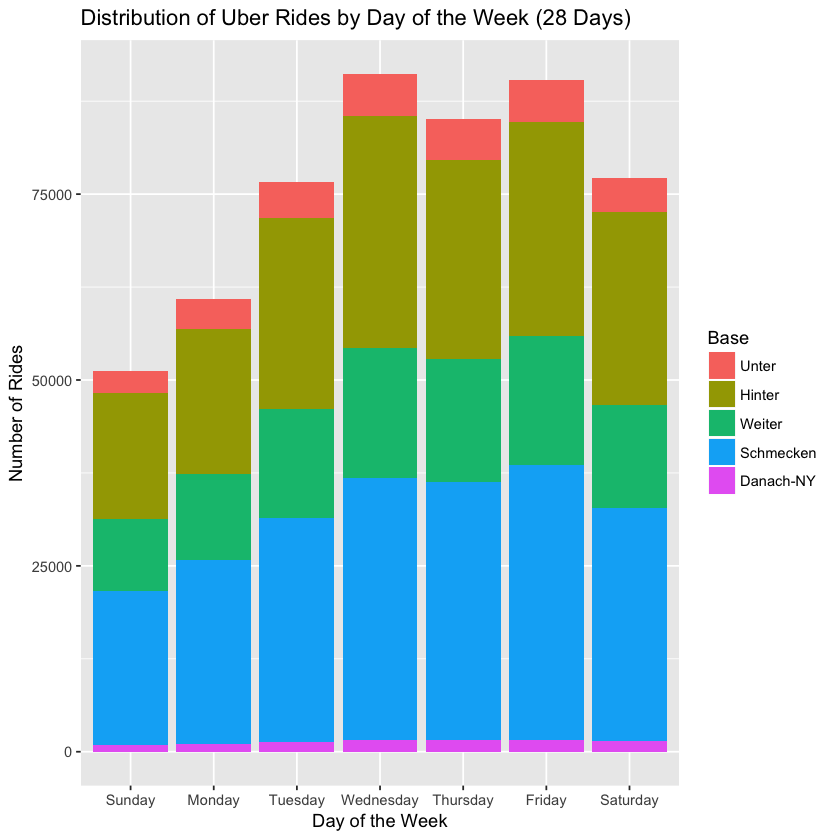

In [8]:
ggplot(data[(day(data$DateTime) > 2),]) +
        geom_bar(aes(x = wday(DateTime, label=T, abbr =F), fill = Base)) +
        ggtitle('Distribution of Uber Rides by Day of the Week (28 Days)') +
        xlab('Day of the Week') + 
        ylab('Number of Rides')

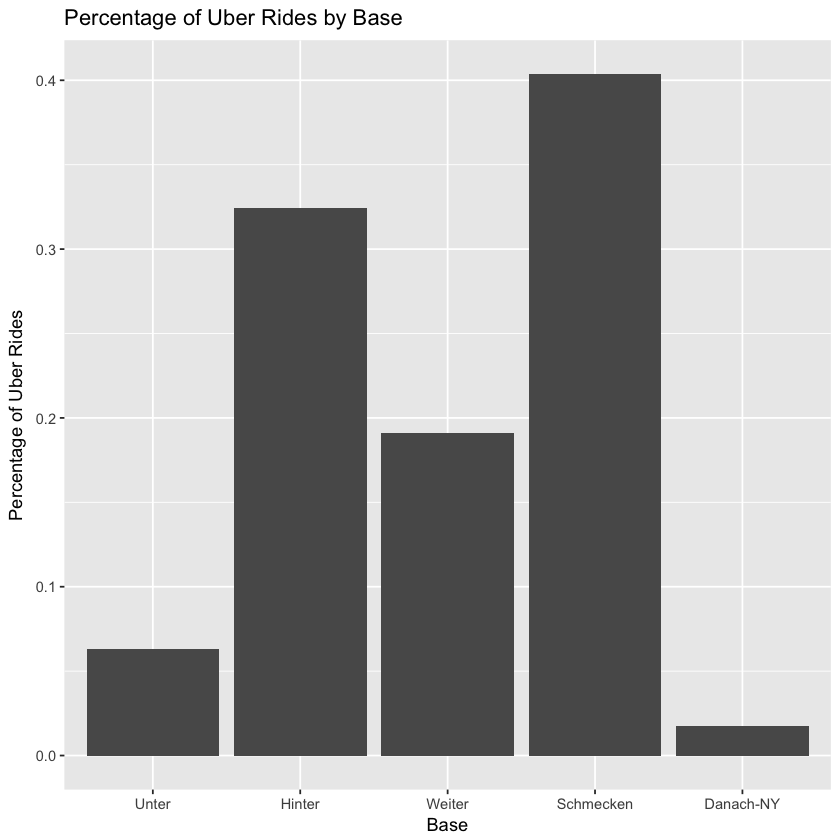

In [9]:
ggplot(data) + 
        geom_bar(aes(x = Base, y = (..count..)/sum(..count..))) +
        ggtitle('Percentage of Uber Rides by Base') +
        xlab('Base') +
        ylab('Percentage of Uber Rides')

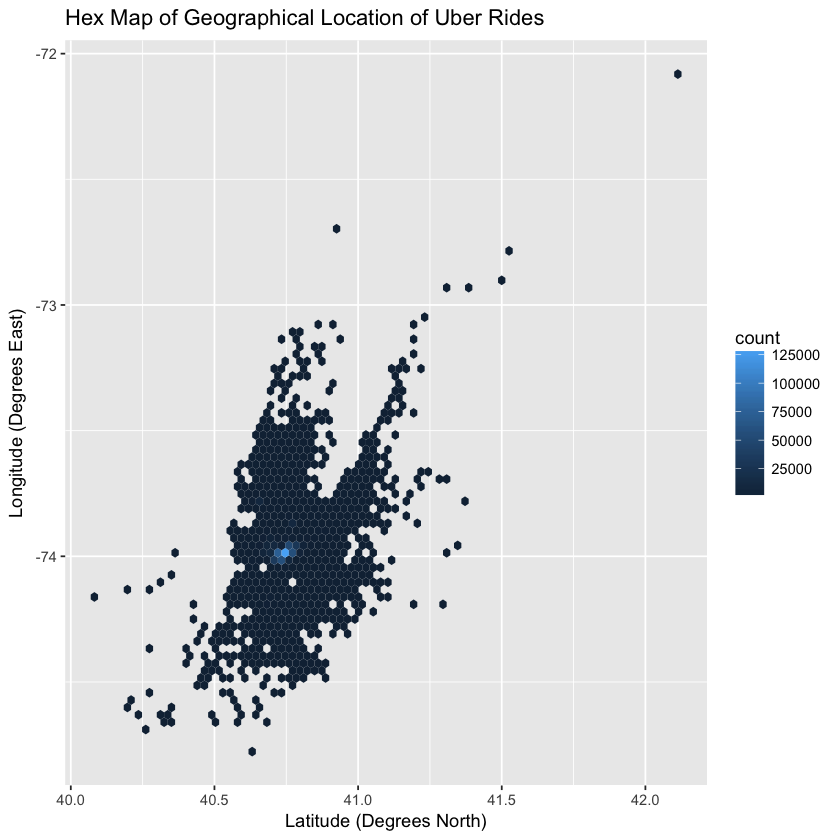

In [10]:
ggplot(data) + 
    geom_hex(aes(x = Lat, y = Lon), bins = 80) + 
    ggtitle('Hex Map of Geographical Location of Uber Rides') + 
    xlab('Latitude (Degrees North)')  +
    ylab('Longitude (Degrees East)')

Observations

All Uber bases are clustered around Manhattan, with no clear relationship between base and geographical location.
There are peaks at approximately 7 am and 6 pm - roughly near the beginning and end of the workday.
Over the course of the month, there is a rough weekly cycle. The average number of rides per day hovers around 18000, with dips on Sundays.
There is an interesting outlier - 35000 rides on April 30.
There are few meetings on Sunday, which rises until it peaks at Wednesday and Friday.
The Uber Base Schmecken has the largest share of uber rides, while Danach-NY has the least.
Uber rides are heavy focused on a small section of New York, mainly Manhattan.

possible explanations

Manhattan has the highest population density, uber rides will cluster around that density for commercial success.
Bases are a label applied by Uber for organizational success, and have no relation to geographical location.
Uber rides peak corresponding to work times - 7 am prior to the beginning of work and 6 pm after work is over.